## Neuron example - 2+ delays

In [11]:
using CairoMakie
using LinearAlgebra
include("neuronfunc.jl") #system of neuron example
include("neurontau.jl") #Delay forumla for neuron example
include("f_deriv.jl") #used to find state and/or parameter derivatives
include("jacobian_new.jl") #Jacobian function
include("newton_new.jl") #Newton function
include("F_eq.jl") #Initialisates a function to find equilibria 
include("track_curve_new.jl") #Tracking curve function (used for continuation and equilibria branches)
include("stab_func.jl")

stab_func (generic function with 1 method)

In [12]:
k=0.5
beta=-1
a12=1
a21=2.34 #0 
tau1=0.2
tau2=0.2
taus=1.5

nd=3 #there are 3 delays

#y01,feq=F_eq(neuronfunc,[0.0,0],[k,beta,a12,a21,tau1,tau2,taus], nd, par_indx=4)#varying paramter a21 so parameter index is 4
#may need to add delay function f_tau to F_eq
y01,feq=F_eq(neuronfunc,[0.0,0],[k,beta,a12,a21,tau1,tau2,taus], nd, par_indx=4)#varying paramter a21 so parameter index is 4


([0.0, 0.0, 2.34], var"#f_equilibrium#33"{Int64, typeof(neuronfunc), Vector{Float64}, Int64, Int64}(4, Main.neuronfunc, [0.5, -1.0, 1.0, 2.34, 0.2, 0.2, 1.5], 3, 2))

In [13]:
#check equilibrium 
xvec=[fill(0.0,2) for _ in 1:nd+1]
neuronfunc(xvec,[k,beta,a12,a21,tau1,tau2,taus])

2-element Vector{Float64}:
 0.0
 0.0

In [14]:
#Test stability of initial point (I think it should be unstable)
x0=y01[1:2]
p0=y01[3]
stabi,eigvalsi,eigvecs1=stab_func(neuronfunc,neurontau,x0,[p0],[k,beta,a12,a21,tau1,tau2,taus],[4],nd,doprint=1)
unstabindx=findfirst(isequal(1),real(eigvalsi).>0)
unstabeigi=eigvalsi[unstabindx]

println("The stability is: $stabi")
println("The eigenvalues are: $eigvalsi")
println("The unstable eigenvalue $unstabeigi") #this values seems to match that given in DDE-Biftool example

The stability is: 0
The eigenvalues are: ComplexF64[-968.7660348034071 + 0.0im, -968.5375195436628 - 14.653396899307069im, -968.5375195436628 + 14.653396899307069im, -967.8521945592739 - 29.292579296872145im, -967.8521945592739 + 29.292579296872145im, -966.710722020216 - 43.903346422597444im, -966.710722020216 + 43.903346422597444im, -965.1142048297761 - 58.47152495663181im, -965.1142048297761 + 58.47152495663181im, -963.0641855544266 - 72.9829827208269im, -963.0641855544266 + 72.9829827208269im, -960.5626449278141 - 87.42364233091526im, -960.5626449278141 + 87.42364233091526im, -957.6119999296247 - 101.77949479477547im, -957.6119999296247 + 101.77949479477547im, -954.2151014409508 - 116.03661304497504im, -954.2151014409508 + 116.03661304497504im, -950.3752314791366 - 130.1811653914015im, -950.3752314791366 + 130.1811653914015im, -946.0961000139373 - 144.19942888147452im, -946.0961000139373 + 144.19942888147452im, -941.381841368752 - 158.07780255470982im, -941.381841368752 + 158.077802

In [15]:
#eigvalsi

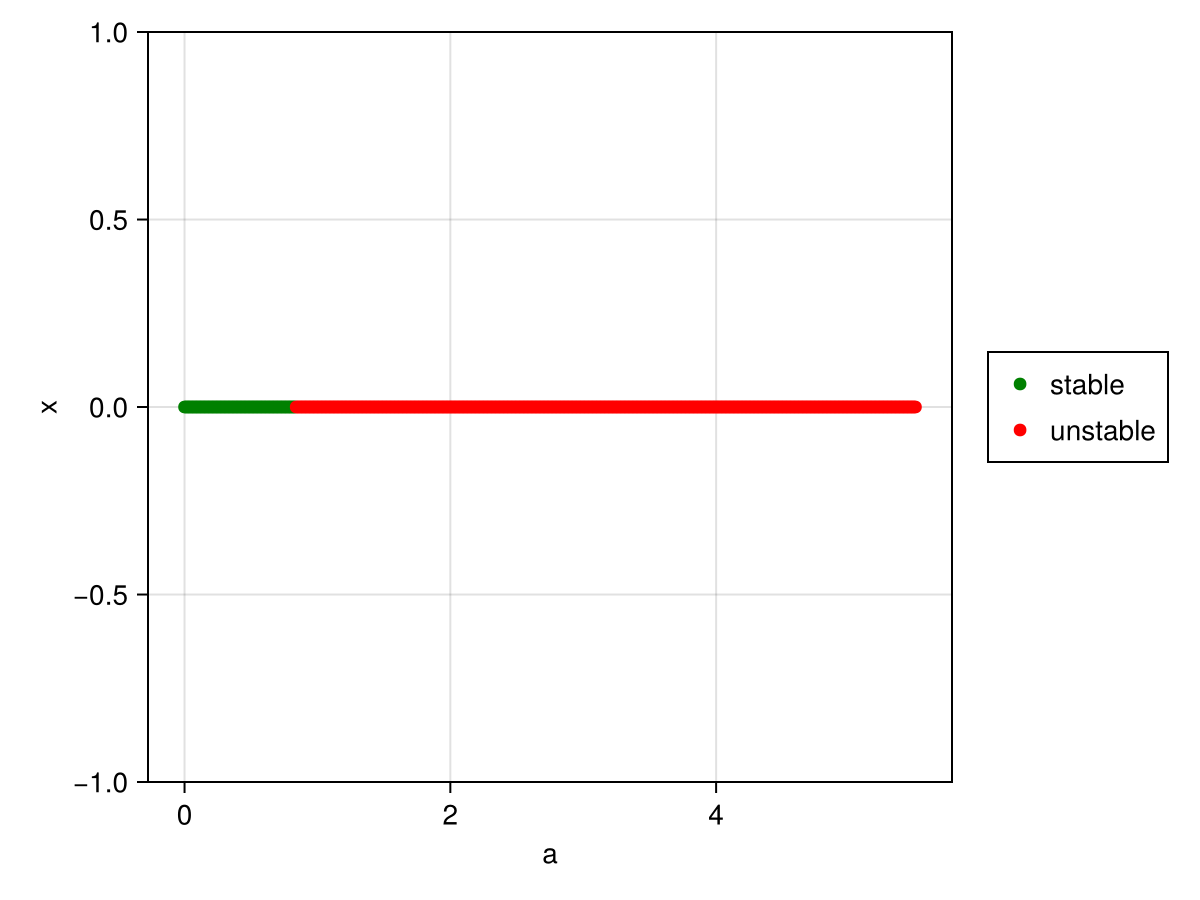

In [ ]:
y02,feq2=F_eq(neuronfunc,[0.0,0],[k,beta,a12,0,tau1,tau2,taus], nd, par_indx=4)
alist1,ytan1=track_curve_new(feq2,y02,[0.0,0,1],nmax=550)

xmat1=hcat([u[1] for u in alist1],[u[2] for u in alist1])
xlist1=[xmat1[i,:] for i in 1:size(xmat1,1)]

plist1=[u[3] for u in alist1]

m=100 #number of discretised steps
n=2 #number of states (x1,x2)
neq=length(plist1) #number of equilibrium points we're finding the stability of
stab=fill(NaN,neq)
#eigvals1=fill(ComplexF64[],neq,n*(1+m*nd))
eigvals1=[fill(0.0+0.0*im,n*(1+nd*m)) for _ in 1:neq]

for i in 1:neq
    #stab[i],eigvals1[i],=stab_func(neuronfunc,neurontau,x0,[p0],[k,beta,a12,a21,tau1,tau2,taus],[4],nd,doprint=1,m=m)
    stab[i],eigvals1[i],=stab_func(neuronfunc,neurontau,xlist1[i],[plist1[i]],[k,beta,a12,a21,tau1,tau2,taus],[4],nd,doprint=1,m=m)

end

stable=(stab.==1.0)
unstable=(stab.==0.0)

fig2=Figure()
ax2=Axis(fig2[1,1],xlabel="a21",ylabel="x")
scatter!(ax2,plist1[stable],[u[1] for u in xlist1[stable]],label="stable",color="green")
scatter!(ax2,plist1[unstable],[u[1] for u in xlist1[unstable]],label="unstable",color="red")
Legend(fig2[1,2], ax2, merge=true)
fig2

In [32]:
avals=[u[3] for u in alist1] #list of a21  values
unstab_indx=findfirst(isequal(0.0),stab)
a21unstab=avals[unstab_indx]

0.8400000000000005

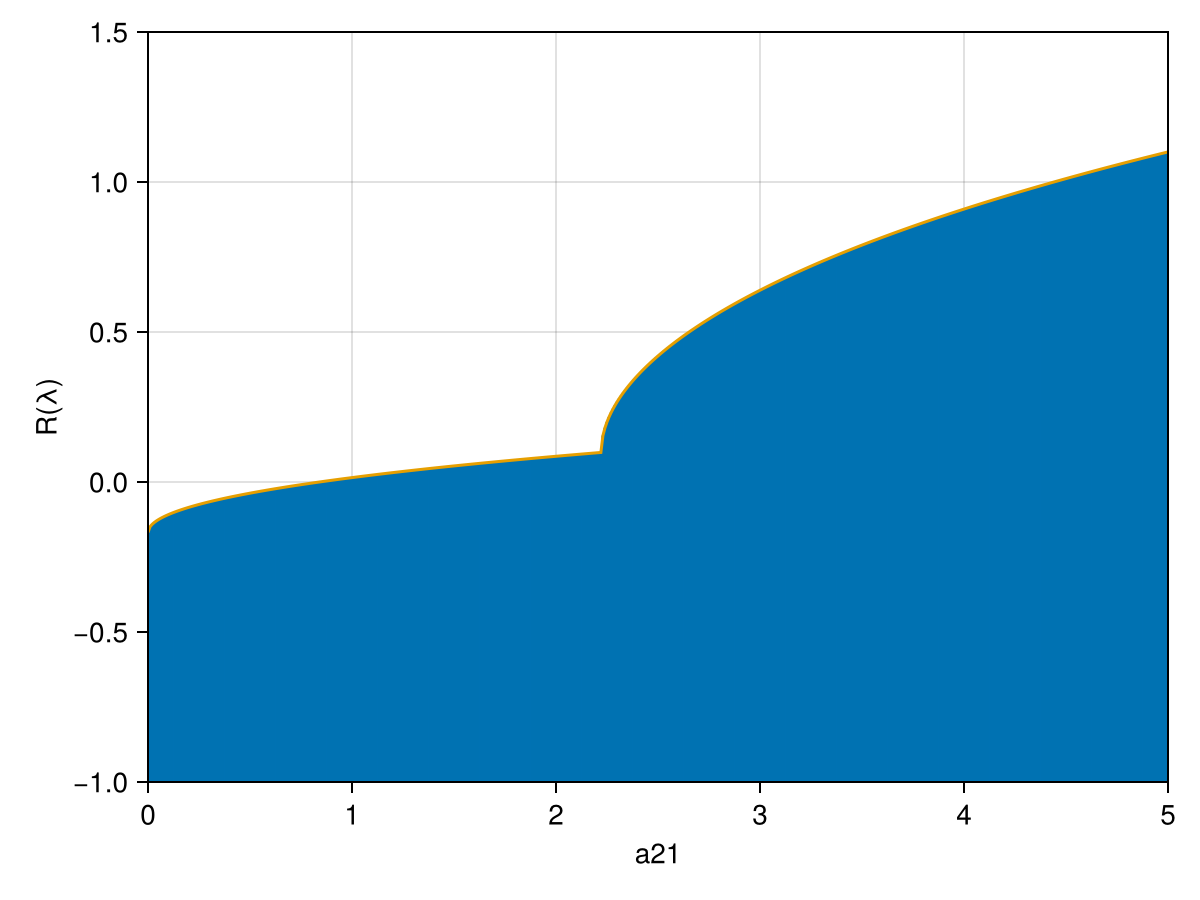

In [45]:
realeigs=real(eigvals1) #gets real parts of all eigenvalues for each tracked point
n_eig=length(realeigs)
#argmax.(realeigs) #finds index of largest real part of eigenvalues for each parameter a21 value

maxrealeigs=fill(NaN,n_eig)

for i in 1:n_eig
    realindx=argmax(realeigs[i]) #finds index of largest real part of eigenvalues for a21 value
    maxrealeigs[i]=realeigs[i][realindx] #the largest real part of eigenvalues for the a21 value
end

avalsrep=repeat(avals,inner=n*(1+m*nd))
realeigsflat=vcat(realeigs...)#flattens vector of vectors 


fig3=Figure()
ax3=Axis(fig3[1,1],xlabel="a21",ylabel="R(λ)")
#scatter!(ax3,avals,maxrealeigs)
lines!(ax3,avalsrep,realeigsflat)
lines!(ax3,avals,maxrealeigs)
xlims!(ax3,[0.0,5])
ylims!(ax3,[-1,1.5])
fig3